<a href="https://colab.research.google.com/github/shishuaiyan/dlaicourse/blob/master/mobilenet_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 装载google云硬盘

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


### 解压云盘中的训练数据

In [6]:
!mkdir clear_2
!mkdir clear_2/clear_2
!unzip -q /content/drive/My\ Drive/Colab\ Notebooks/img_data/clear_2.zip -d /content/clear_2/

mkdir: cannot create directory ‘clear_2/clear_2’: File exists


In [0]:
import os
train_dir = '/content/clear_2/clear_2/train'
valid_dir = '/content/clear_2/clear_2/valid'
checkpoint_path = '/content/clear_2/output/ckpt_model/model-{epoch:04d}.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path)

batch_size = 64
img_size = 96
epoch = 200

if not os.path.isdir(checkpoint_dir):
    os.makedirs(checkpoint_dir)

In [13]:
import tensorflow as tf
from tensorflow import keras

pre_trained_model = keras.applications.mobilenet_v2.MobileNetV2(input_shape=(96,96,3), include_top=True, weights='imagenet')
# pre_trained_model.summary()
last_layer = pre_trained_model.get_layer('global_average_pooling2d_1')
last_output = last_layer.output
x = keras.layers.Dropout(0.5)(last_output)
x = keras.layers.Dense(1, activation='sigmoid',
            # kernel_regularizer=keras.regularizers.l1_l2(),
            name='output_dense')(x)
model = keras.Model(pre_trained_model.input, x)
model.compile(optimizer=keras.optimizers.Adam(lr=0.0001),
              loss='binary_crossentropy',
              metrics=['acc'])


train_data_gen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255.,
    width_shift_range=0.05,
    height_shift_range=0.05,
    shear_range=0.2,
    zoom_range=0.,
    horizontal_flip=True,
    cval=0, fill_mode='reflect')
valid_data_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)
train_generator = train_data_gen.flow_from_directory(train_dir,
                            batch_size=batch_size,
                            class_mode='binary',
                            target_size=(img_size,img_size))
valid_generator = valid_data_gen.flow_from_directory(valid_dir,
                            batch_size=batch_size,
                            class_mode='binary',
                            target_size=(img_size,img_size))
train_step_per_epoch = int(train_generator.samples / batch_size) + 1
valid_step_per_epoch = int(valid_generator.samples / batch_size) + 1
save_callback = keras.callbacks.ModelCheckpoint(checkpoint_path, 
                        save_weights_only=True,
                        verbose=1,
                        period=2)
history = model.fit_generator(train_generator, 
                validation_data=valid_generator,
                steps_per_epoch=train_step_per_epoch,
                epochs=epoch,
                validation_steps=valid_step_per_epoch,
                verbose=2,
                callbacks=[save_callback]
                )

Found 19312 images belonging to 2 classes.
Found 3976 images belonging to 2 classes.
Epoch 1/200
302/302 - 86s - loss: 0.1502 - acc: 0.9411 - val_loss: 0.7078 - val_acc: 0.5000
Epoch 2/200

Epoch 00002: saving model to /content/clear_2/output/ckpt_model/model-0002.ckpt
302/302 - 74s - loss: 0.0634 - acc: 0.9779 - val_loss: 0.7666 - val_acc: 0.5000
Epoch 3/200
302/302 - 72s - loss: 0.0532 - acc: 0.9824 - val_loss: 0.8283 - val_acc: 0.5000
Epoch 4/200

Epoch 00004: saving model to /content/clear_2/output/ckpt_model/model-0004.ckpt
302/302 - 73s - loss: 0.0462 - acc: 0.9842 - val_loss: 0.9272 - val_acc: 0.5000
Epoch 5/200
302/302 - 73s - loss: 0.0428 - acc: 0.9854 - val_loss: 1.0396 - val_acc: 0.5000
Epoch 6/200

Epoch 00006: saving model to /content/clear_2/output/ckpt_model/model-0006.ckpt
302/302 - 73s - loss: 0.0354 - acc: 0.9881 - val_loss: 1.1372 - val_acc: 0.5000
Epoch 7/200
302/302 - 73s - loss: 0.0319 - acc: 0.9896 - val_loss: 1.2877 - val_acc: 0.5000
Epoch 8/200

Epoch 00008: sa

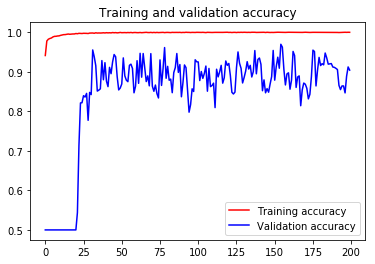

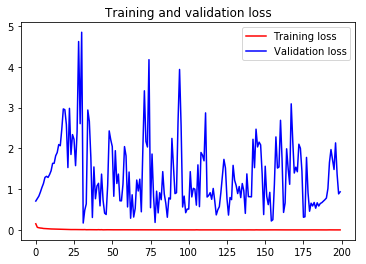

In [14]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure()
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)

plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)

plt.show()

### 选择某epoch保存的模型压缩成zip

In [11]:
!zip -r /content/clear_2/output/ckpt_model_100.zip /content/clear_2/output/ckpt_model/model-0100*

  adding: content/clear_2/output/ckpt_model/model-0100.ckpt.data-00000-of-00002 (deflated 7%)
  adding: content/clear_2/output/ckpt_model/model-0100.ckpt.data-00001-of-00002 (deflated 88%)
  adding: content/clear_2/output/ckpt_model/model-0100.ckpt.index (deflated 80%)


In [0]:
import time
pb_save_base_dir = '/content/clear_2/output/pb_model'
if not os.path.isdir(pb_save_base_dir):
    os.makedirs(pb_save_base_dir)

pb_model_dir = os.path.join(pb_save_base_dir, str(int(time.time())))
tf.contrib.saved_model.save_keras_model(model, pb_save_base_dir)
for i in range(5):  # 自动创建的名字和time()有差距，一般是1，故加此判断
    pb_model_dir = os.path.join(pb_save_base_dir, str(int(os.path.basename(pb_model_dir))+i))
    if os.path.isdir(pb_model_dir):
        pb_model_path = os.path.join(pb_model_dir, 'saved_model.pb')
        print('pb model saved in {}'.format(pb_model_path))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.utils.build_tensor_info or tf.compat.v1.saved_model.build_tensor_info.
INFO:tensorflow:Signatures INCLUDED in export for Classify: None
INFO:tensorflow:Signatures INCLUDED in export for Regress: None
INFO:tensorflow:Signatures INCLUDED in export for Predict: None
INFO:tensorflow:Signatures INCLUDED in export for Train: ['train']
INFO:tensorflow:Signatures INCLUDED in export for Eval: None
INFO:tensorflow:No assets to save.
INFO:tensorflow:No assets to write.
INFO:tensorflow:Signatures INCLUDED in export for Clas